## csvファイルをグラフ化する
---
* モジュールをインポートする
* 初回の実行では時間がかかる
  * `!pip install japanize-matplotlib` の実行が理由

In [1]:
#      file.       :plotCsv.ipynb
#      author.     :k.ishizeki
#      Revision.   :2021/10/07

%matplotlib inline
%pip install japanize-matplotlib    #グラフのラベルに日本語を使うため
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import csv
import os
from scipy.optimize import curve_fit

#カレントディレクトリを取得する
cwd = os.getcwd()

#画像ファイルを保存するディレクトリ
dir_fig = '/fig'
os.makedirs(cwd + dir_fig, exist_ok=True)

Note: you may need to restart the kernel to use updated packages.


## グラフの書式設定
* 細かいことはコード内のコメントへ

In [2]:
#グラフを表示する画像の設定
plt.rcParams['figure.figsize'] = [9, 5]   #画像サイズは 9[Inch]*5[Inch]
plt.rcParams['figure.dpi']      = 100    #100 [dpi] (Dot per Inch)
plt.rcParams['figure.facecolor']  = 'w'   #画像の背景の色は白
plt.rcParams['figure.edgecolor'] = 'w'   #画像の枠線は白

#目盛りの設定
plt.rcParams['xtick.direction'] = 'in'        #x軸の目盛り線は内向き
plt.rcParams['ytick.direction'] = 'in'        #y軸の目盛線は内向き
plt.rcParams['xtick.top'] = True           #上部に目盛り線を描く
plt.rcParams['ytick.right'] = True          #右部に目盛り線を描く
plt.rcParams['xtick.major.size'] = 8.0      #x軸主目盛り線の長さ
plt.rcParams['ytick.major.size'] = 8.0      #y軸主目盛り線の長さ
plt.rcParams['xtick.minor.visible'] = True   #x軸の副目盛り線を描く
plt.rcParams['ytick.minor.visible'] = True   #y軸の副目盛り線を描く
plt.rcParams['xtick.minor.size'] = 4.0       #x軸副目盛り線の長さ
plt.rcParams['ytick.minor.size'] = 4.0       #y軸副目盛り線の長さ

#グリッドの設定
plt.rcParams['axes.grid']  = True        #グリッド線を表示する
plt.rcParams['axes.axisbelow'] = True   #グリッド線を最背面に移動する(指定しないとグラフの点と重なって見えにくい)

#凡例の設定
plt.rcParams['legend.loc'] = 'best'           #凡例の位置を指定。'best'で最適な場所に配置される
plt.rcParams['legend.frameon'] = True       #凡例を枠で囲う
plt.rcParams['legend.framealpha'] = 1.0     #透過度を指定。1.0で透過率0%


## 実験1のデータをプロットする
* plotFileにファイル名を入れる
* #### $F = k \frac{1}{r^{2}}$で近似する

[0.00127062]


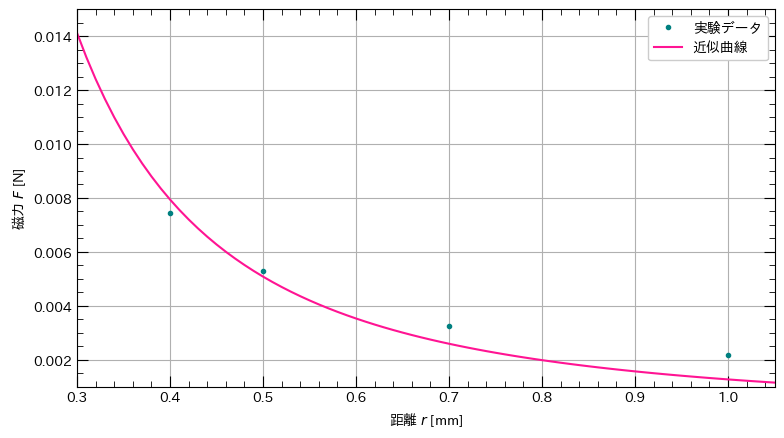

In [5]:
plotFile = '/data.csv'
csvPath = cwd + plotFile

input = []
output = []
with open(csvPath) as f:
    reader = csv.reader(f)
    #1行目はヘッダーなので読み飛ばす
    header= next(reader)
    for row in reader:
        input.append(row[0])
        output.append(row[1])
        #print(row)

#リストを浮動小数点型に変換
input_f = [float(s) for s in input]
output_f = [float(s) for s in output]

ga = 9.80665
mass = np.array(output_f) * 0.001
force = mass * ga
force = force

xdata = np.arange(0.01, 1.10, 0.01)
def fitting(x, a):
    return a * x**(-2)
param, cov = curve_fit(fitting, input_f, force)
y_fit = param[0]*xdata**(-2) 
print(param)

#プロットする
plt.plot(input_f, force, color='teal', marker='.', markersize=6, linestyle='None', label='実験データ')
plt.plot(xdata, y_fit, color='deeppink',linestyle='-', label='近似曲線')
#x軸ラベル
plt.xlabel('距離 $r$ [mm]')
#y軸ラベル 
plt.ylabel('磁力 $F$ [N]')
plt.xlim(0.3, 1.05)
plt.ylim(0.001, 0.015)
#凡例
plt.legend()
#保存する
#plt.savefig(os.path.join(cwd + dir_fig, 'fig2.png'))
plt.show()


# 平行バネの設計
### 板長さ：7 mm
* $F_k = k \times x $
* $F = mg$

-0.009186648420301067


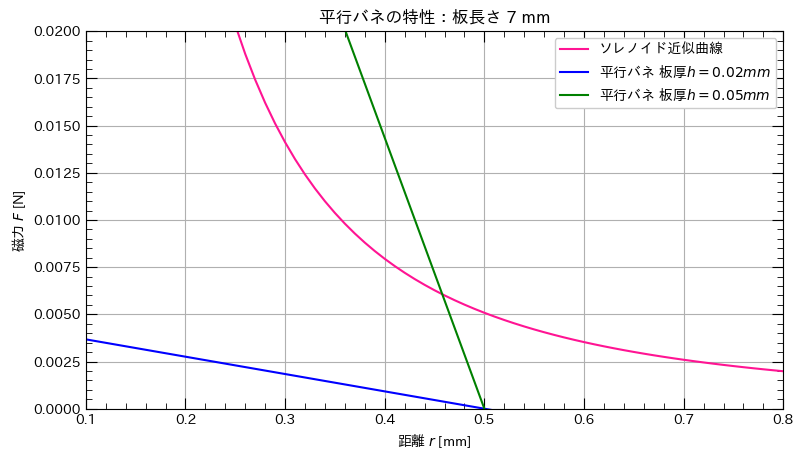

In [6]:
#k = 0.08
#k=-param*27.0/(4*(0.5**3))
F_k = 0.00
l = 7.0
b = 5.0
h1 = 20*10**(-3)
h2 = 50*10**(-3)
E_st = 193*10**3 #ヤング率 [GPa]
E_al = 74*10**3  #ヤング率 [GPa]

k1 = -4*b*h1**3*E_st/(9.8*l**3)
k2 = -4*b*h2**3*E_st/(9.8*l**3)

print(k1)
F_k1 = k1*(xdata-0.5)
F_k2 = k2*(xdata-0.5)

#プロットする
plt.plot(xdata, y_fit, color='deeppink',linestyle='-', label='ソレノイド近似曲線')
plt.plot(xdata, F_k1, color='blue', linestyle='-', label='平行バネ 板厚$h = 0.02 mm$')
plt.plot(xdata, F_k2, color='green', linestyle='-', label='平行バネ 板厚$h = 0.05 mm$')
#タイトル
plt.title('平行バネの特性：板長さ 7 mm')
#x軸ラベル
plt.xlabel('距離 $r$ [mm]')
#y軸ラベル 
plt.ylabel('磁力 $F$ [N]')
plt.xlim(0.1, 0.8)
plt.ylim(0.0, 0.02)
#凡例
plt.legend()
#保存する
#plt.savefig(os.path.join(cwd + dir_fig, 'ステンレス検討_l=7mm.png'))
plt.show()



# 平行バネの設計
### 板長さ：6 mm
* $F_k = k \times x $
* $F = mg$

-0.001823507180650038 -0.014588057445200303 -0.04923469387755101 -0.11670445956160243 -0.22793839758125475


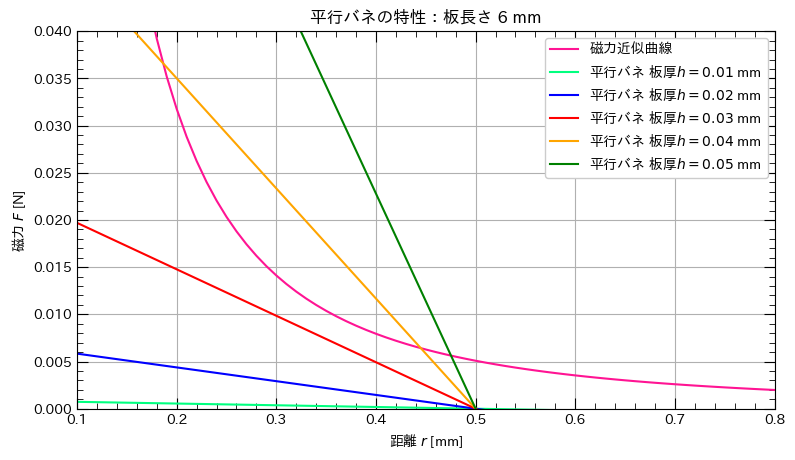

In [9]:
#k = 0.08
#k=-param*27.0/(4*(0.5**3))
F_k = 0.00
l = 6.0
b = 5.0
h10 = 10*10**(-3)
h20 = 20*10**(-3)
h30 = 30*10**(-3)
h40 = 40*10**(-3)
h50 = 50*10**(-3)
E_st = 193*10**3 #ヤング率 [GPa]
E_al = 74*10**3  #ヤング率 [GPa]

k10 = -4*b*h10**3*E_st/(9.8*l**3)
k20 = -4*b*h20**3*E_st/(9.8*l**3)
k30 = -4*b*h30**3*E_st/(9.8*l**3)
k40 = -4*b*h40**3*E_st/(9.8*l**3)
k50 = -4*b*h50**3*E_st/(9.8*l**3)

print(k10, k20, k30, k40, k50)

F_k10 = k10*(xdata-0.5)
F_k20 = k20*(xdata-0.5)
F_k30 = k30*(xdata-0.5)
F_k40 = k40*(xdata-0.5)
F_k50 = k50*(xdata-0.5)

#プロットする
plt.plot(xdata, y_fit, color='deeppink',linestyle='-', label='磁力近似曲線')
plt.plot(xdata, F_k10, color='springgreen', linestyle='-', label='平行バネ 板厚$h = 0.01$ mm')
plt.plot(xdata, F_k20, color='blue', linestyle='-', label='平行バネ 板厚$h = 0.02$ mm')
plt.plot(xdata, F_k30, color='red', linestyle='-', label='平行バネ 板厚$h = 0.03$ mm')
plt.plot(xdata, F_k40, color='orange', linestyle='-', label='平行バネ 板厚$h = 0.04$ mm')
plt.plot(xdata, F_k50, color='green', linestyle='-', label='平行バネ 板厚$h = 0.05$ mm')
#タイトル
plt.title('平行バネの特性：板長さ 6 mm')
#x軸ラベル
plt.xlabel('距離 $r$ [mm]')
#y軸ラベル 
plt.ylabel('磁力 $F$ [N]')
plt.xlim(0.1, 0.8)
plt.ylim(0.0, 0.04)
#凡例
plt.legend()
#保存する
#plt.savefig(os.path.join(cwd + dir_fig, 'ステンレス検討_l=6mm_5種.png'))
plt.show()

